In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: MacOSX


In [3]:
def load_clients(filename):

    with open(filename, 'rb') as fp:
        clients = pickle.load(fp)
    print("client size: ", len(clients))
    
    distribution = {}
    for client in clients:
        distribution[client] = distribution.get(client, 0) + 1

    distribution = sorted(distribution.items(), key=lambda x: -x[-1])
    x = np.array([i[0] for i in distribution])
    y = np.array([i[1] for i in distribution])
    print("distinct clients: ",len(x))
    print("var: ", np.var(y))
    return x, y

In [4]:
def savefig_word_distribution(x, y, topk=50):
    x_top = x[:topk]
    y_top = y[:topk]
    total_clients = np.sum(y)
    with plt.style.context("seaborn"):
        plt.xticks(rotation=90)
        
        plt.xlabel("words")
        plt.ylabel("word_counts")
        plt.title("Words Count Distribution")
        plt.plot(x_top, y_top, '^-')
        plt.savefig(f"./clients_{total_clients}.png", format="png")


In [5]:
x, y = load_clients("./zipf_remove_top5_1989.txt")
savefig_word_distribution(x, y, topk=50)



client size:  1989
distinct clients:  234
var/client:  12.585552268244577


: 

In [5]:
x, y = load_clients("./triehh_clients_remove_top5_90740.txt")
savefig_word_distribution(x, y, topk=50)

client size:  90740
distinct clients:  15737
var/client:  0.06305916690756608


## Generate Zipf Distribution dataset

In [8]:
import numpy as np
import pandas as pd

a = np.random.zipf(1.5, 2200)                                            


with open("./triehh_clients_remove_top5_90740.txt", 'rb') as f:
    data = pickle.load(f) 

k = np.bincount(a)[1:]

value_counts = pd.value_counts(data)

value_counts.sort_values(ascending=False)

clients = []
rank = 0
for item in value_counts.keys():
    clients += [item]*k[rank]
    rank += 1

np.random.shuffle(clients)
n = len(clients)

with open(f"./zipf_{n}.txt", 'wb') as f:
    pickle.dump(clients, f)


## Generate Poisson distribution dataset

In [ ]:
import numpy as np

import pandas as pd

a = np.random.poisson(100, 2000)                                            


with open("./triehh_clients_remove_top5_90740.txt", 'rb') as f:
    data = pickle.load(f) 

k = np.bincount(a)[1:]

value_counts = pd.value_counts(data)

value_counts.sort_values(ascending=False)

clients = []
rank = 0
for item in value_counts.keys():
    clients += [item]*k[rank]
    rank += 1

np.random.shuffle(clients)

with open("./zipf_remove_top5_20000.txt", 'wb') as f:
    pickle.dump(clients, f)


In [ ]:
mechanism = ['fedft', 'wtrie', 'triehh','pem']
color = ["blue","orange", "green",  "red"]
score = 'F1'
connectionloss = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
dir = ["../results/connectionloss_99411/", "../results/connectionloss_90740/"]
plt.figure()
for clsr in connectionloss:
    for inx, mc in enumerate(mechanism):
        filename = f"{mechanism}_cls{clsr}_F1"
        col = color[inx]
        

## Generate Numeric Dataset
> https://www.kaggle.com/datasets/ahmedsowah/fitbit-fitness-data (dailySteps_merged.csv)

In [13]:
import pandas as pd
import pickle
import os 
import time
import matplotlib.pyplot as plt

In [14]:
steps_df = pd.read_csv("./dailySteps_merged.csv")

In [5]:
steps_df.describe()

Id     StepTotal
count  9.400000e+02    940.000000
mean   4.855407e+09   7637.910638
std    2.424805e+09   5087.150742
min    1.503960e+09      0.000000
25%    2.320127e+09   3789.750000
50%    4.445115e+09   7405.500000
75%    6.962181e+09  10727.000000
max    8.877689e+09  36019.000000

In [9]:
steps_df.head()

Id ActivityDay  StepTotal
0  1503960366   4/12/2016      13162
1  1503960366   4/13/2016      10735
2  1503960366   4/14/2016      10460
3  1503960366   4/15/2016       9762
4  1503960366   4/16/2016      12669

In [8]:
steps_df.ActivityDay.unique()

array(['4/12/2016', '4/13/2016', '4/14/2016', '4/15/2016', '4/16/2016',
       '4/17/2016', '4/18/2016', '4/19/2016', '4/20/2016', '4/21/2016',
       '4/22/2016', '4/23/2016', '4/24/2016', '4/25/2016', '4/26/2016',
       '4/27/2016', '4/28/2016', '4/29/2016', '4/30/2016', '5/1/2016',
       '5/2/2016', '5/3/2016', '5/4/2016', '5/5/2016', '5/6/2016',
       '5/7/2016', '5/8/2016', '5/9/2016', '5/10/2016', '5/11/2016',
       '5/12/2016'], dtype=object)

In [3]:
specific_date = '4/24/2016'
filter_df = (steps_df.loc[steps_df.ActivityDay == specific_date])

[3. 0. 3. 0. 4. 2. 2. 2. 2. 1. 1. 2. 1. 2. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 1.] [    0.           766.26666667  1532.53333333  2298.8
  3065.06666667  3831.33333333  4597.6         5363.86666667
  6130.13333333  6896.4         7662.66666667  8428.93333333
  9195.2         9961.46666667 10727.73333333 11494.
 12260.26666667 13026.53333333 13792.8        14559.06666667
 15325.33333333 16091.6        16857.86666667 17624.13333333
 18390.4        19156.66666667 19922.93333333 20689.2
 21455.46666667 22221.73333333 22988.        ]


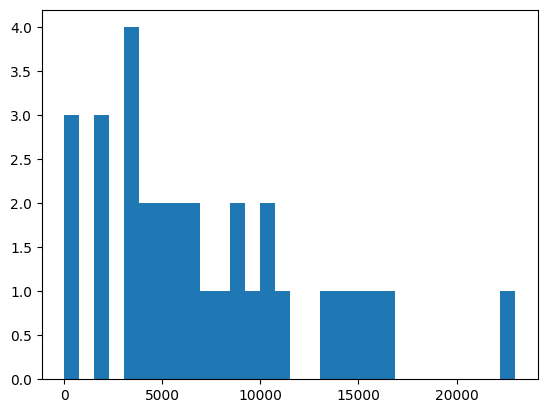

In [37]:
from random import randint


distribution_p = filter_df.StepTotal/filter_df.StepTotal.sum()

counts, bins, _ = plt.hist(filter_df.StepTotal, bins=30)
print(counts, bins)
counts_p = counts/counts.sum()


In [31]:
import numpy as np

In [32]:

def gen_samples(n, bins):
    synthetic_list = []
    for j in range(n):
        choice_list = [randint(int(bins[i]), int(bins[i+1])+1) for i in range(len(bins)-1)]
        synthetic_list.append(np.random.choice(choice_list, p=counts_p))
    return synthetic_list


(array([937., 940., 942., 603., 636., 151., 477., 155.,   0., 159.]),
 array([    0. ,  2298.8,  4597.6,  6896.4,  9195.2, 11494. , 13792.8,
        16091.6, 18390.4, 20689.2, 22988. ]),
 <BarContainer object of 10 artists>)

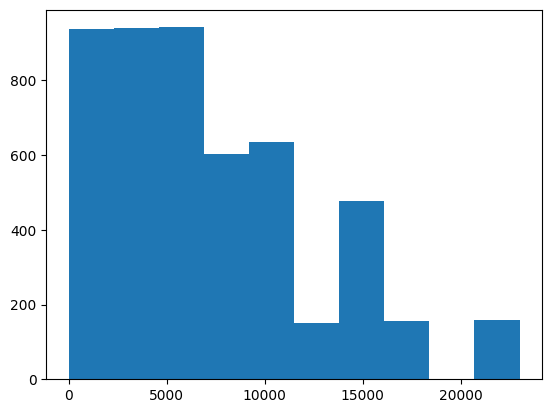

In [38]:
gen_SC = gen_samples(5000, bins)
plt.hist(gen_SC)

In [34]:
binary_data = [bin(i) for i in gen_SC]

In [88]:
binary_data[:10]

['0b10001000100100',
 '0b10000111101110',
 '0b1101010100101',
 '0b101011110100101',
 '0b101001010100',
 '0b1011001011101',
 '0b11110110',
 '0b110111110101',
 '0b100001000101001',
 '0b10100110000000']

In [89]:
gen_SC[:10]

[8740, 8686, 6821, 22437, 2644, 5725, 246, 3573, 16937, 10624]

In [39]:
with open("synthetic_steps.txt", 'wb') as f:
    pickle.dump(gen_SC, f)

In [85]:
type(gen_SC)

list

## Share Car Location

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import s2cell
import plotly.express as px

ModuleNotFoundError: No module named 's2cell'

In [2]:
path = "./shareCarLoc.csv"
df_car = pd.read_csv(path)


In [4]:
df_car = df_car[df_car["total_cars"]>0]

In [8]:
df_car["s2cell"] = df_car.apply(lambda row: s2cell.lat_lon_to_cell_id(row["latitude"], row["longitude"]), axis = 1)

In [36]:
def Ts2cell(row):
    s2cell = (row["s2cell"] >> 11) << 11
    timestamp = pd.to_datetime(row["timestamp"])
    hour = timestamp.hour
    minute = timestamp.minute
    return s2cell + ((hour << 6) + minute)

df_car["Ts2cell"] = df_car.apply(Ts2cell, axis = 1)

In [63]:
df_car["hour"] = df_car.apply(lambda x: x["timestamp"].split(":")[0].split(" ")[-1], axis=1)
# str.split
# minute = df_car["timestamp"][1].minute
# df_car_st = df_car[df_car["timestamp"].hour == hour and df_car["timestamp"].minute == minute]

In [360]:
df_group_by_hour = df_car.groupby(["hour", "latitude", "longitude", "s2cell"])["total_cars"].sum()

In [3]:
df_group_by_hour = pd.read_csv("./groupByhourCarShar.csv")

In [37]:
hour = 22
df_car_h = df_group_by_hour[df_group_by_hour["hour"] == hour] 
top_3 = df_car_h.sort_values(by="total_cars", ascending=False).iloc[:3, :]

In [38]:
fig = px.density_mapbox(df_car_h, width=900, height=900, lat="latitude", lon="longitude", z="total_cars", mapbox_style="stamen-terrain", radius=40, zoom=12)

In [39]:

import plotly.graph_objects as go
fig.add_trace(go.Scattermapbox(
        lat=top_3["latitude"],
        lon=top_3["longitude"],
        mode='markers+text',
        marker=go.scattermapbox.Marker(
            size=10,
            
            color='black',
            opacity=0.5
        ),
        showlegend= False,
    ))

fig.add_trace(go.Scattermapbox(
        lat=top_3["latitude"],
        lon=top_3["longitude"],
        mode='markers+text',
        marker=go.scattermapbox.Marker(
            size=8,
            color='red',
            # symbol="cross"
            
        ),
        # hovertext = ["Hot Car Park"],
        # hoverinfo='text',
        name="Hot Car Park",
        # showlegend=False
    ))

fig.update_layout(
    legend=dict(
    yanchor="top",
    y=0.99,
    font = dict(size = 32),
    xanchor="left",
    x=0.2
))



fig.write_html("map.html")

In [54]:

for i in range(3):
    print(f"(lat: {top_3['latitude'].values[i]}, lon: {top_3['longitude'].values[i]}, s2cell: {bin(top_3['s2cell'].values[i])[2:]})")

(lat: 32.111506, lon: 34.840876, s2cell: 1010100011101010010011110101010110000010101000011110000110011)
(lat: 32.0849, lon: 34.7966, s2cell: 1010100011101010010111011111111011101110001111001001100001001)
(lat: 32.1097, lon: 34.8408, s2cell: 1010100011101010010011110101100101001101110111011111011101001)


In [6]:
import plotly.io as pio
pio.write_image(fig, "h10shareCar.png")


ValueError: Transform failed with error code 525: Mapbox error.

# Sentiment140

In [1]:
import numpy as np
import pandas as pd 
from bs4 import BeautifulSoup
import re
import nltk

In [5]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', header=None)
# rename column name
df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']
df_users_text = df[:][['user', 'text']]
df_user = df_users_text.groupby(df['user']).aggregate(lambda x: list(x))

In [ ]:
df_user_ = df_user[:][['text']]
# Remove links, punctuations, and numbers
df_user_['clean_text'] = df_user_['text'].apply(lambda x: " ".join(re.sub(r"([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[.,!?:;-='...\"@#_]", "", i) for i in x))

# remove numbers in clean_text
df_user_['clean_text'] = df_user_['clean_text'].apply(lambda x: " ".join(re.sub(r"([0-9])", "", i.lower()) for i in x.split()))

In [ ]:
stop_words_dict = dict.fromkeys(nltk.corpus.stopwords.words('english'), 1)
# Remove stop words
df_user_["clean_text"] = df_user_["clean_text"].apply(lambda x: " ".join(i for i in x.split() if i not in stop_words_dict))


In [104]:
# tokeniser = RegexpTokenizer("*")
df_user_['clean_text'] = df_user_['clean_text'].apply(lambda x: x.split())

In [106]:
# Normalize words
"""The last step consists in normalizing the text. What does it mean? 
We want to convert a word to its base form. For example, playing, plays and play can seem different to the computer, but they are the same thing.
We need to produce the root forms of these words. The nltk module plays a relevant role this time too. It provides the WordNetLemmatizer function, which looks for the lemmas of the words using a database, called WordNet.
"""
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()
df_user_["clean_text"] = df_user_["clean_text"].apply(lambda tokens: [lemmatiser.lemmatize(token, pos='v') for token in tokens])


In [ ]:
from collections import Counter
# count word frequency in data
# for user in range(20):
#     data = df_user_.iloc[user][1]
#     print(Counter(data).most_common(1))


df_user_["frequent words"] = df_user_["clean_text"].apply(lambda x: Counter(x).most_common(1)[0][0] if x else '')

In [147]:
df_user_.to_csv("sentiment140_clean.csv")

In [ ]:
import pickle
from collections import Counter
with open("word_frequency_per_client.txt", "wb") as f:
    pickle.dump(Counter(df_user_['frequent words'].values).most_common(), f)


In [57]:
df_user_ = pd.read_csv("sentiment140_clean.csv") # 659775 clients --> dropna 659596 clients

# words_counts = df_user_['frequent words'].value_counts()

In [58]:
df_user_.head()

user                                               text  \
0     000catnap000  ["kinda miss my mom  shouldn't have called her...   
1  000matthewkelly  ['Just had a facebook Friend purge..  Where di...   
2        000yea000               ['thank God we finally found her! ']   
3        0010x0010  ['@JoannaGoff  Really ? LOL ...no not personal...   
4      001BabyGirl  ['@ianvisagie Why??? ', 'Is going to Stone fea...   

                                          clean_text frequent words  
0  ['kinda', 'miss', 'mom', 'shouldnt', 'call', '...    wumbologist  
1  ['facebook', 'friend', 'purge', 'people', 'com...       facebook  
2                ['thank', 'god', 'finally', 'find']          thank  
3  ['joannagoff', 'really', 'lol', 'personally', ...     joannagoff  
4  ['ianvisagie', 'go', 'stone', 'featherbrook', ...     ianvisagie

In [36]:
# freqeunt words has nan? drop nan
df_user_.dropna(inplace=True)

In [39]:
hhs = df_user_["frequent words"].values

In [40]:
import pickle
with open("./sentiment140_user_clean.txt", "wb") as f:
    pickle.dump(hhs, f)

In [4]:
import numpy as np
import pandas as pd

a = np.random.zipf(1.5, len(words_counts.keys()))                                            
k = np.bincount(a)[1:]

words = []
rank = 0
for item in words_counts.keys():
    words += [item]*k[rank]
    print(item," [with frequency]: ", k[rank])
    rank += 1

# np.random.shuffle(clients)
# n = len(clients)




im  [with frequency]:  57945
get  [with frequency]:  20311
go  [with frequency]:  10948
work  [with frequency]:  7206
good  [with frequency]:  5222
love  [with frequency]:  3958
miss  [with frequency]:  3148
watch  [with frequency]:  2595
cant  [with frequency]:  2115
want  [with frequency]:  1848
feel  [with frequency]:  1598
u  [with frequency]:  1422
think  [with frequency]:  1210
back  [with frequency]:  1129
really  [with frequency]:  1026
dont  [with frequency]:  891
day  [with frequency]:  831
wish  [with frequency]:  692
still  [with frequency]:  715
thank  [with frequency]:  656
need  [with frequency]:  627
oh  [with frequency]:  570
like  [with frequency]:  510
today  [with frequency]:  487
happy  [with frequency]:  439
new  [with frequency]:  416
look  [with frequency]:  424
try  [with frequency]:  385
make  [with frequency]:  393
time  [with frequency]:  395
home  [with frequency]:  323
lol  [with frequency]:  324
one  [with frequency]:  291
amp  [with frequency]:  295
sad 

([<matplotlib.axis.XTick at 0x7f229bc0a490>,
 [Text(1, 0, 'im'),
  Text(2, 0, 'get'),
  Text(3, 0, 'go'),
  Text(4, 0, 'work'),
  Text(5, 0, 'good'),
  Text(6, 0, 'love'),
  Text(7, 0, 'miss'),
  Text(8, 0, 'watch'),
  Text(9, 0, 'cant'),
  Text(10, 0, 'want')])

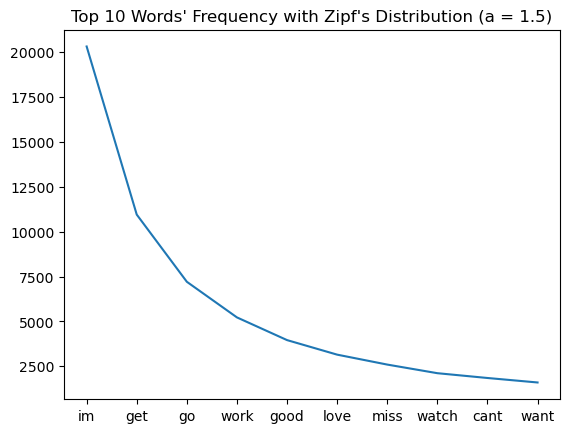

In [20]:
end = 11
ran = [i for i in range(1,end)]
plt.plot(ran, k[1:end])
plt.title("Top 10 Words' Frequency with Zipf's Distribution (a = 1.5)")
plt.xticks(ran, words_counts.keys()[:end-1])

In [9]:
import random


data_size = 1000000
zipf_words =random.choices(words, k=data_size)
with open(f"./zipf_clean_{data_size}.txt", 'wb') as f:
    pickle.dump(zipf_words, f)

# Reddit Comments

In [1]:
import numpy as np
import pandas as pd 
from bs4 import BeautifulSoup
import re
import nltk
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train-balanced-sarcasm.csv')

In [4]:
df = df[:][['author', 'comment']]

In [5]:
df.rename(columns={'comment': 'text', "author": "user"}, inplace=True)

In [30]:
df_user = df.groupby(df['user']).aggregate(lambda x: list(x))
df_user_ = df_user[:][['text']]


In [31]:
# Remove links, punctuations, and numbers
df_user_['clean_text'] = df_user_['text'].apply(lambda x: " ".join(re.sub(r"([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[.,!?:;-='...\"@#_]", "", str(i)) for i in x))

# remove numbers in clean_text
df_user_['clean_text'] = df_user_['clean_text'].apply(lambda x: " ".join(re.sub(r"([0-9])", "", i.lower()) for i in x.split()))

In [32]:
df_user_["clean_text"][:10]

user
---                     the alarm puller wore a mask too feminism is t...
--------__--------      here you dropped this is that chucks of shit n...
------___--___------    dunno do we need more white actors in video ga...
-----BroAway-----       ive never seen anything quite like a tims line...
----_____----           the weight could mess with your ignition lock ...
----branflakes----      mexico is going to pay for the wall i think yo...
---0---                 you cheapo spilling coffee or crumbs from food...
---Eagle---             nobodys electing a third bush not as important...
---Earth---             yeah as balanced as pre nerfs ec giant freeze ...
---_--_---              maybe ru so i can farm purple points playing a...
Name: clean_text, dtype: object

In [33]:
stop_words_dict = dict.fromkeys(nltk.corpus.stopwords.words('english'), 1)
# Remove stop words
df_user_["clean_text"] = df_user_["clean_text"].apply(lambda x: " ".join(i for i in x.split() if i not in stop_words_dict))


In [37]:
# Normalize words
"""The last step consists in normalizing the text. What does it mean? 
We want to convert a word to its base form. For example, playing, plays and play can seem different to the computer, but they are the same thing.
We need to produce the root forms of these words. The nltk module plays a relevant role this time too. It provides the WordNetLemmatizer function, which looks for the lemmas of the words using a database, called WordNet.
"""
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()
df_user_["clean_text"] = df_user_["clean_text"].apply(lambda tokens: [lemmatiser.lemmatize(token, pos='v') for token in tokens.split()])


In [38]:
df_user_["clean_text"]

user
---                     [alarm, puller, wear, mask, feminism, bold, no...
--------__--------      [drop, chuck, shit, narcan, another, name, nal...
------___--___------    [dunno, need, white, actors, video, game, must...
-----BroAway-----       [ive, never, see, anything, quite, like, tims,...
----_____----              [weight, could, mess, ignition, lock, pervert]
                                              ...                        
zzztyu                  [size, doesnt, matter, say, unless, carry, poc...
zzzxxc1                 [pls, let, us, calipedes, st, cnn, local, pedo...
zzzzz94                 [part, simply, present, modern, date, texts, c...
zzzzzzzzzzzzzzdz        [detail, give, yeah, nonasians, cant, spell, a...
zzzzzzzzzzzzzzzzspaf    [election, day, year, wont, happen, also, know...
Name: clean_text, Length: 256561, dtype: object

In [39]:
from collections import Counter

df_user_["frequent words"] = df_user_["clean_text"].apply(lambda x: Counter(x).most_common(1)[0][0] if x else '')


In [40]:
df_user_.to_csv("Reddit_clean.csv")

In [41]:
import pickle
from collections import Counter
with open("reddit_word_frequency_per_client.txt", "wb") as f:
    pickle.dump(Counter(df_user_['frequent words'].values).most_common(), f)


In [46]:

df = pd.read_csv("Reddit_clean.csv") 
df.dropna(inplace=True)

words_counts = df['frequent words'].value_counts()

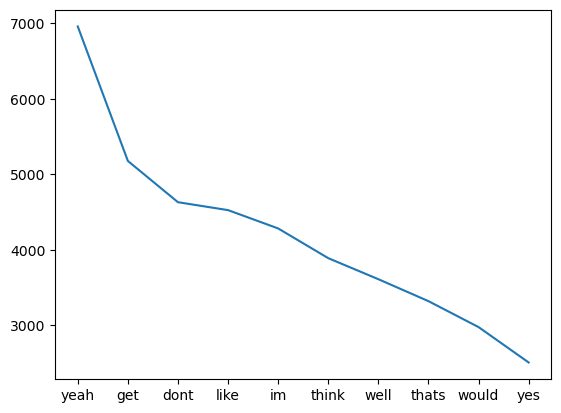

In [47]:
words_counts[:10]

plt.plot(words_counts[:10])

In [48]:
hhs = df["frequent words"].values
print(len(hhs))

256521


In [49]:
import pickle
with open("./Reddit_clean.txt", "wb") as f:
    pickle.dump(hhs, f)

In [ ]:
import random

data_size = 1000000
zipf_words =random.choices(words, k=data_size)
with open(f"./zipf_clean_{data_size}.txt", 'wb') as f:
    pickle.dump(zipf_words, f)